In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_excel("singstat_historical_shipping.xlsx")


In [5]:
df["Data Series"] = pd.to_datetime(df["Data Series"])
df
df["Data Series"] = pd.to_datetime(df["Data Series"])
df.sort_values(by="Data Series", inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df

,Data Series,prevVA,prevTC,prevTCT,gdp,Vessel Arrivals,Total Cargo,Total Container Throughput
0,1996-01-01,8876,24871.1,946.4,10816.717329,9592,25808.4,1047.7
1,1996-02-01,7593,22954.8,867.4,10506.360582,8687,23739.6,958.4
2,1996-03-01,8610,25394.0,969.5,10582.691717,9971,26446.1,1021.5
3,1996-04-01,8483,25076.7,960.1,10605.887064,9633,26945.7,1041.0
4,1996-05-01,8749,25824.3,988.3,10658.725732,9836,26302.3,1093.6
...,...,...,...,...,...,...,...,...
324,2023-01-01,7213,52096.0,3143.7,20189.449983,10035,47812.4,2989.5
325,2023-02-01,6440,45205.0,2843.5,19922.918506,9202,45592.9,2684.4
326,2023-03-01,7307,48660.1,3089.5,19904.596632,10270,50523.3,3335.5
327,2023-04-01,7608,47132.1,3042.0,19895.997529,9987,49521.8,3264.7


In [9]:
import requests

r = requests.post('http://127.0.0.1:5000//current_data', json={})
r.json()

{'820454400000': {'prevVA': 8876,
  'prevTC': 24871.1,
  'prevTCT': 946.4,
  'gdp': 10816.7173291675,
  'Vessel Arrivals ': 9592,
  'Total Cargo ': 25808.4,
  'Total Container Throughput ': 1047.7},
 '823132800000': {'prevVA': 7593,
  'prevTC': 22954.8,
  'prevTCT': 867.4,
  'gdp': 10506.3605824323,
  'Vessel Arrivals ': 8687,
  'Total Cargo ': 23739.6,
  'Total Container Throughput ': 958.4},
 '825638400000': {'prevVA': 8610,
  'prevTC': 25394.0,
  'prevTCT': 969.5,
  'gdp': 10582.6917166858,
  'Vessel Arrivals ': 9971,
  'Total Cargo ': 26446.1,
  'Total Container Throughput ': 1021.5},
 '828316800000': {'prevVA': 8483,
  'prevTC': 25076.7,
  'prevTCT': 960.1,
  'gdp': 10605.8870643594,
  'Vessel Arrivals ': 9633,
  'Total Cargo ': 26945.7,
  'Total Container Throughput ': 1041.0},
 '830908800000': {'prevVA': 8749,
  'prevTC': 25824.3,
  'prevTCT': 988.3,
  'gdp': 10658.7257323311,
  'Vessel Arrivals ': 9836,
  'Total Cargo ': 26302.3,
  'Total Container Throughput ': 1093.6},
 '8335

<Axes: xlabel='Data Series'>

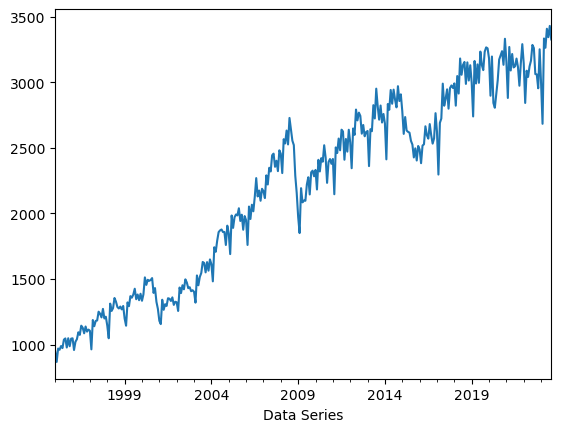

In [56]:
df = pd.read_excel("singstat_historical_shipping.xlsx")
df.columns = df.iloc[0]
df = df.iloc[1:]
df["Data Series"] = pd.to_datetime(df["Data Series"])
df.sort_values(by="Data Series", inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index("Data Series", inplace=True)
df["Total Container Throughput "].plot(kind="line")

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61206D+00    |proj g|=  5.37140D-02

At iterate    5    f=  5.59145D+00    |proj g|=  4.69675D-03

At iterate   10    f=  5.58948D+00    |proj g|=  1.22881D-02

At iterate   15    f=  5.57172D+00    |proj g|=  1.49034D-02

At iterate   20    f=  5.56109D+00    |proj g|=  4.68344D-03

At iterate   25    f=  5.56058D+00    |proj g|=  5.11235D-03

At iterate   30    f=  5.55833D+00    |proj g|=  4.50130D-03

At iterate   35    f=  5.55808D+00    |proj g|=  8.85869D-04

At iterate   40    f=  5.55803D+00    |proj g|=  1.64677D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

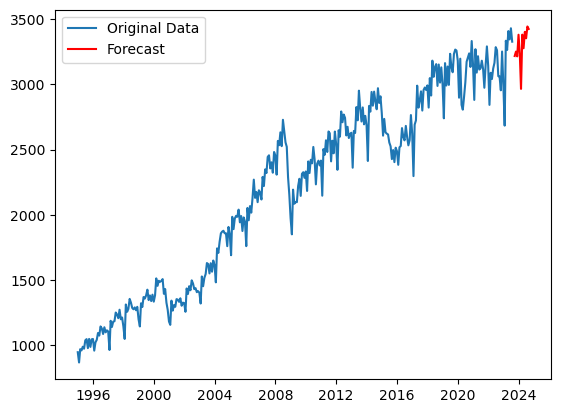

In [74]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

model = SARIMAX(np.asarray(df['Total Container Throughput '], dtype=float), order=order, seasonal_order=seasonal_order)
results = model.fit()
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
plt.plot(df['Total Container Throughput '], label='Original Data')

# Plot the forecast
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:]
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')

plt.legend()
plt.show()